In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

%matplotlib inline

In [11]:
df = pd.read_csv(r'E:\projects\stock_details_5_years.csv')
utc = True
df['Date'] = pd.to_datetime(df['Date'])
df.dropna(subset=['Close', 'Open', 'Volume'], inplace=True)
companies = ['AAPL', 'GOOGL', 'MSFT', 'AMZN', 'TSLA']
df = df[df['Company'].isin(companies)]
df.head()

C:\Users\EBENEHI GIFT\AppData\Local\Temp\ipykernel_8988\3467068668.py:3: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['Date'] = pd.to_datetime(df['Date'])


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Company
0,2018-11-29 00:00:00-05:00,43.829761,43.863354,42.639594,43.083508,167080000,0.0,0.0,AAPL
1,2018-11-29 00:00:00-05:00,104.769074,105.519257,103.534595,104.636131,28123200,0.0,0.0,MSFT
2,2018-11-29 00:00:00-05:00,54.176498,55.007500,54.099998,54.729000,31004000,0.0,0.0,GOOGL
3,2018-11-29 00:00:00-05:00,83.749496,84.499496,82.616501,83.678497,132264000,0.0,0.0,AMZN
6,2018-11-29 00:00:00-05:00,23.133333,23.166668,22.636667,22.744667,46210500,0.0,0.0,TSLA


<Figure size 1000x500 with 0 Axes>

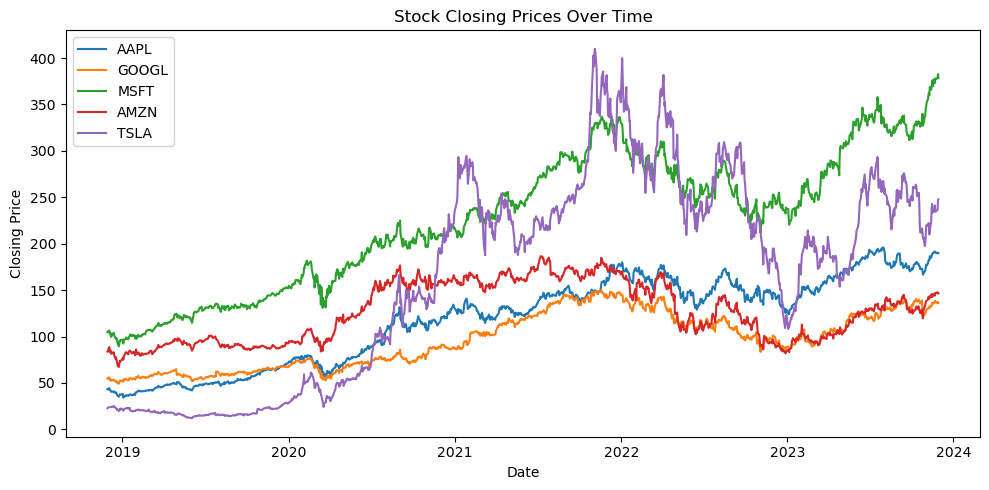

In [12]:
plt.figure(figsize=(10, 5))
for company in companies:
    sub_df = df[df['Company'] == company]
    plt.plot(sub_df['Date'], sub_df['Close'], label=company)
plt.title("Stock Closing Prices Over Time")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.legend()
plt.tight_layout()
plt.show()

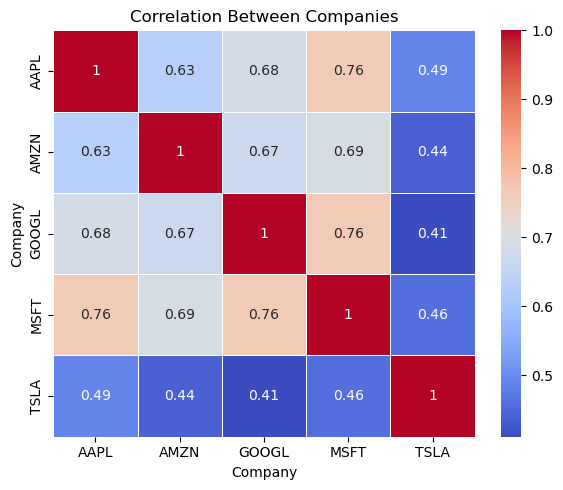

In [13]:
returns = df.pivot(index='Date', columns='Company', values='Close').pct_change().dropna()

plt.figure(figsize=(6, 5))
sns.heatmap(returns.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Between Companies")
plt.tight_layout()
plt.show()

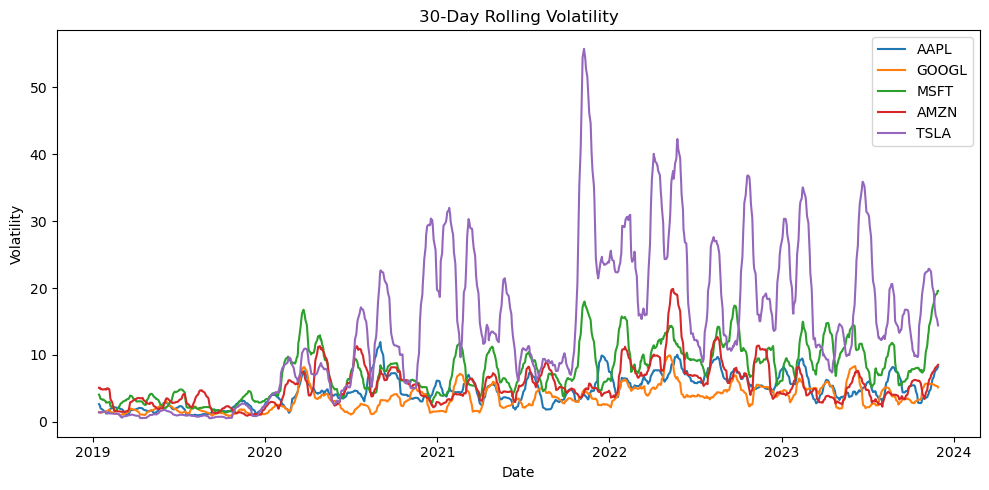

In [14]:
plt.figure(figsize=(10, 5))
for company in companies:
    temp = df[df['Company'] == company].set_index('Date')
    temp['Rolling_STD'] = temp['Close'].rolling(30).std()
    plt.plot(temp.index, temp['Rolling_STD'], label=company)
plt.title("30-Day Rolling Volatility")
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# This code is to be saved as a .py document and to be run in jupyter terminal

import streamlit as st
import pandas as pd
import plotly.express as px

# Load dataset
df = pd.read_csv(r'E:\projects\stock_details_5_years.csv')
#df['Date'] = pd.to_datetime(df['Date'])
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df = df.dropna(subset=['Close', 'Open', 'Volume'])

# Available companies
companies = ['AAPL', 'GOOGL', 'MSFT', 'AMZN', 'TSLA']
df = df[df['Company'].isin(companies)]

# Sidebar
st.sidebar.header("Filter Options")
selected_company = st.sidebar.selectbox("Select Company", companies)

# Filter by company
filtered_df = df[df['Company'] == selected_company]

# Date range slider
#min_date = filtered_df['Date'].min()
#max_date = filtered_df['Date'].max()
#date_range = st.sidebar.date_input("Select Date Range", [min_date, max_date], min_value=min_date, max_value=max_date)

# Apply date range filter
#filtered_df = filtered_df[(filtered_df['Date'] >= pd.to_datetime(date_range[0])) &
 #                         (filtered_df['Date'] <= pd.to_datetime(date_range[1]))]
# Ensure both are timezone-naive before comparison
#filtered_df = filtered_df[
  #  (filtered_df['Date'].dt.tz_localize(None) >= pd.to_datetime(date_range[0])) &
  #  (filtered_df['Date'].dt.tz_localize(None) <= pd.to_datetime(date_range[1]))
#]


# Dashboard title
st.title("📈 Stock Market Dashboard")

# Key statistics
st.subheader(f"📊 Summary Statistics for {selected_company}")
st.write({
    "Average Close": round(filtered_df['Close'].mean(), 2),
    "Max High": round(filtered_df['High'].max(), 2),
    "Min Low": round(filtered_df['Low'].min(), 2),
    "Average Volume": int(filtered_df['Volume'].mean())
})

# Line chart: Closing Price
fig = px.line(filtered_df, x='Date', y='Close', title=f"{selected_company} Closing Prices")
st.plotly_chart(fig)

# Area chart: Volume
fig_vol = px.area(filtered_df, x='Date', y='Volume', title=f"{selected_company} Trading Volume")
st.plotly_chart(fig_vol)